In [1]:
import cv2
import lane_detection
import lane_following
from matplotlib import pyplot as plt

In [2]:
IP_ADDRESS = "192.168.1.102"

In [3]:
#vcap = cv2.VideoCapture(f"rtsp://{IP_ADDRESS}:8554/rovcam")
vcap = cv2.VideoCapture('AUV_Vid.mkv')
#img = cv2.imread('frame_from_auv.jpg')

 got a frame 
[0, 0, 475.191333938035, 0, 873.6691235348326, 1080]


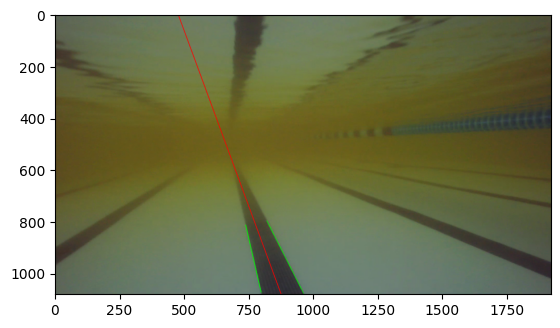

In [4]:
MAX_RETRY = 100
count = 0
while count < MAX_RETRY:
    count += 1
    # Obtain the frame
    ret, frame = vcap.read()

    # Get screen height
    screen_height = 1080 #frame.shape[0] # bad code, idc

    # Check frame was received successfully
    if ret:
        # got a frame, close the cap and return the frame
        print(" got a frame ")
        gray = lane_detection.proccess_img(frame)
        lines = lane_detection.detect_lines(gray, 50, 50, 3, 50, 50)
        lanes = lane_detection.detect_lanes(lines, screen_height=screen_height)
        laned_img = lane_detection.draw_lanes(frame, lanes)

        #for lane in lanes: # get and draw lane centers!
        (center, slope) = lane_following.get_lane_center(lanes)

        print(lane_following.get_center_line(center, slope, screen_height=screen_height))
        
        final_img = lane_following.draw_center(laned_img, lane_following.get_center_line(center, slope, screen_height=screen_height))

        plt.imshow(final_img)
        
        # img = frame
        vcap.release()

vcap.release()